# Imports

In [1]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
import glob
import os

## init

In [2]:
plt.close('all')
pd.options.display.max_rows = 999

In [5]:
# Get all Tweets file paths
raw_data_path = r'../data/raw/*Tweets*.csv'
csv_files = glob.glob(raw_data_path)
csv_files

['../data/raw\\2020-03-29 Coronavirus Tweets.CSV',
 '../data/raw\\2020-03-30 Coronavirus Tweets.CSV',
 '../data/raw\\2020-03-31 Coronavirus Tweets.CSV',
 '../data/raw\\2020-04-01 Coronavirus Tweets.CSV',
 '../data/raw\\2020-04-02 Coronavirus Tweets.CSV',
 '../data/raw\\2020-04-03 Coronavirus Tweets.CSV',
 '../data/raw\\2020-04-04 Coronavirus Tweets.CSV',
 '../data/raw\\2020-04-05 Coronavirus Tweets.CSV',
 '../data/raw\\2020-04-06 Coronavirus Tweets.CSV',
 '../data/raw\\2020-04-07 Coronavirus Tweets.CSV',
 '../data/raw\\2020-04-08 Coronavirus Tweets.CSV',
 '../data/raw\\2020-04-09 Coronavirus Tweets.CSV',
 '../data/raw\\2020-04-10 Coronavirus Tweets.CSV',
 '../data/raw\\2020-04-11 Coronavirus Tweets.CSV',
 '../data/raw\\2020-04-12 Coronavirus Tweets.CSV',
 '../data/raw\\2020-04-13 Coronavirus Tweets.CSV',
 '../data/raw\\2020-04-14 Coronavirus Tweets.CSV',
 '../data/raw\\2020-04-15 Coronavirus Tweets.CSV']

# At glace

In [6]:
df_at_glace = pd.read_csv(csv_files[0], encoding='utf-8')
df_at_glace.head()

,status_id,user_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,...,retweet_count,country_code,place_full_name,place_type,followers_count,friends_count,account_lang,account_created_at,verified,lang
0,1244051646071611394,860252856829587457,2020-03-29T00:00:00Z,IMSS_SanLuis,"Ante cualquier enfermedad respiratoria, no te ...",TweetDeck,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,1008,41,NaN,2017-05-04T22:00:38Z,False,es
1,1244051645039706112,1125933654943895553,2020-03-29T00:00:00Z,intrac_ccs,#ATENCIÓN En el Terminal Nuevo Circo se implem...,TweetDeck,NaN,NaN,NaN,False,...,1,NaN,NaN,NaN,90,316,NaN,2019-05-08T01:21:16Z,False,es
2,1244051645975191557,80943559,2020-03-29T00:00:00Z,rlieving,“People are just storing up. They are staying ...,TweetDeck,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,136,457,NaN,2009-10-08T21:06:08Z,False,en
3,1244051646750928897,817072420947247104,2020-03-29T00:00:00Z,Tu_IMSS_Coah,"Si empezaste a trabajar, necesitas dar de alta...",TweetDeck,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,1549,170,NaN,2017-01-05T18:17:00Z,False,es
4,1244051647032102914,788863557349670913,2020-03-29T00:00:00Z,Tabasco_IMSS,Una sociedad informada está mejor preparada an...,TweetDeck,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,868,125,NaN,2016-10-19T22:05:03Z,False,es


# Read Files

In [8]:
use_columns = ['created_at','text', 'retweet_count', 'country_code', 'followers_count', 'lang', 'screen_name']
data_frames = []
for file in csv_files:
    df = pd.read_csv(file, encoding='utf-8', usecols=use_columns)
    data_frames.append(df)
df = pd.concat(data_frames)
df.head()

,created_at,screen_name,text,retweet_count,country_code,followers_count,lang
0,2020-03-29T00:00:00Z,IMSS_SanLuis,"Ante cualquier enfermedad respiratoria, no te ...",0,NaN,1008,es
1,2020-03-29T00:00:00Z,intrac_ccs,#ATENCIÓN En el Terminal Nuevo Circo se implem...,1,NaN,90,es
2,2020-03-29T00:00:00Z,rlieving,“People are just storing up. They are staying ...,0,NaN,136,en
3,2020-03-29T00:00:00Z,Tu_IMSS_Coah,"Si empezaste a trabajar, necesitas dar de alta...",0,NaN,1549,es
4,2020-03-29T00:00:00Z,Tabasco_IMSS,Una sociedad informada está mejor preparada an...,0,NaN,868,es


# MX Twitts

In [9]:
mx_twitts = df.query('country_code == "MX"')

# ES twitts

In [10]:
es_twitts = df.query('lang == "es"')

In [11]:
es_twitts.count()

created_at         173087
screen_name        173087
text               173087
retweet_count      173087
country_code         8462
followers_count    173087
lang               173087
dtype: int64

# Total vs Es vs Mx

In [12]:
es_twitts.count()

created_at         173087
screen_name        173087
text               173087
retweet_count      173087
country_code         8462
followers_count    173087
lang               173087
dtype: int64

In [13]:
df.count()

created_at         1150403
screen_name        1150403
text               1150403
retweet_count      1150403
country_code         57919
followers_count    1150403
lang               1150403
dtype: int64

In [14]:
mx_twitts.count()

created_at         1593
screen_name        1593
text               1593
retweet_count      1593
country_code       1593
followers_count    1593
lang               1593
dtype: int64

# Chart Total vs ES vs MX

In [15]:
total_twitts = df.count()['text']
total_es = es_twitts.count()['text']
total_mx = mx_twitts.count()['text']

twitts_total_and_es = {'labels': ['total', 'es', 'mx'], 'values': [total_twitts, total_es, total_mx]} 
d = pd.DataFrame(data=twitts_total_and_es)

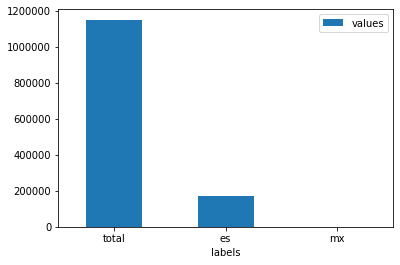

In [16]:
d.plot.bar(x='labels', y='values', rot=0)

# Es twitts acounting

In [17]:
screen_name_total = es_twitts.groupby('screen_name')['text'].nunique().reset_index()

ten = screen_name_total.sort_values(by='text', ascending=False).head(10)
ten

,screen_name,text
65872,lasopapuntocom,451
37528,ReporteYa,385
13314,EFEnoticias,229
1267,A_definitivas,192
54635,diarioelheraldo,186
42189,TimeJustOficial,183
14304,ElPitazoTV,176
79391,tvnnoticias,175
65863,lasillarota,169
53121,covid19BotLatam,156


# es twitts accounting Chart

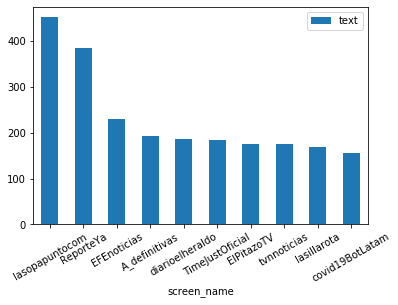

In [18]:
ten.plot.bar(x='screen_name', y='text', rot=30)

# clean memory

In [19]:
# df = None

# Histogram twitts ES Chart

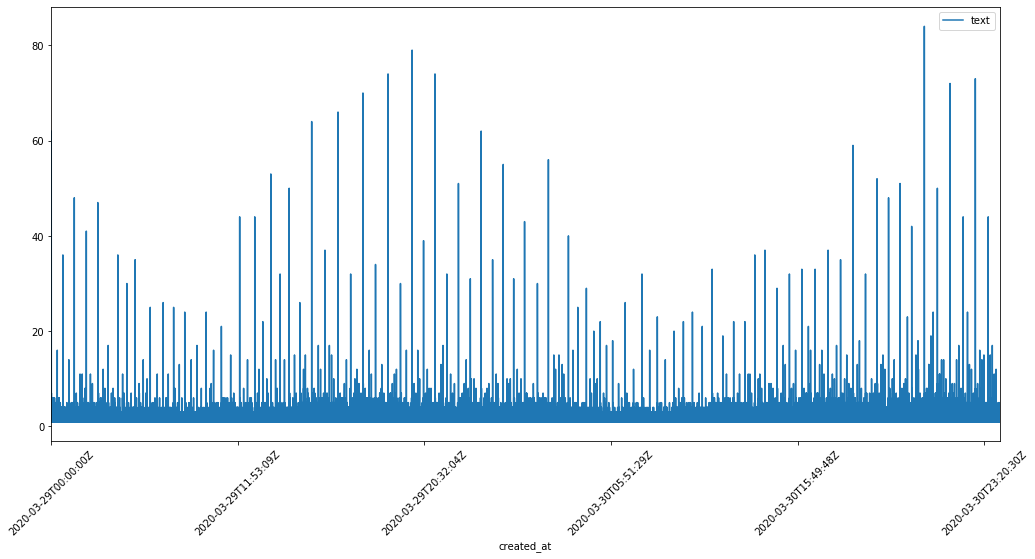

In [20]:
line_df = es_twitts.groupby('created_at')['text'].nunique().reset_index()

line_df.plot(figsize=(17,8), x='created_at', y='text', rot=45)

# Country code

In [21]:
cc = es_twitts.groupby('country_code')['text'].nunique().reset_index()
cc.sort_values(by='text', ascending=False, inplace=True)
cc.head(15)

,country_code,text
23,ES,2005
47,MX,1389
3,AR,914
14,CO,807
12,CL,742
67,US,534
22,EC,486
69,VE,267
54,PE,190
20,DO,168


# Country code chart

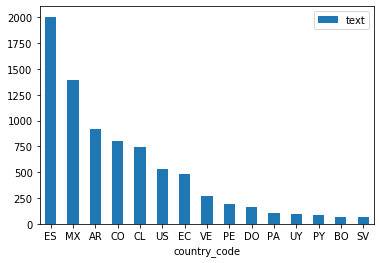

In [22]:
cc.head(15).plot.bar(x='country_code', y='text', rot=0)

# Count words

In [23]:
# change accentsb
es_twitts.replace('á','a', regex=True, inplace=True)
es_twitts.replace('é','e', regex=True, inplace=True)
es_twitts.replace('í','i', regex=True, inplace=True)
es_twitts.replace('ó','o', regex=True, inplace=True)
es_twitts.replace('ú','u', regex=True, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4263: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [24]:
es_twitts.replace('#','', regex=True, inplace=True)
es_twitts.replace('!','', regex=True, inplace=True)
es_twitts.replace('@','', regex=True, inplace=True)
es_twitts.replace('$','', regex=True, inplace=True)

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

In [26]:
text = es_twitts['text']
cv = CountVectorizer()
cv_fit=cv.fit_transform(text)

In [27]:
word_list = cv.get_feature_names()

In [28]:
word_list

['00',
 '000',
 '0000',
 '00000001',
 '00000002',
 '000000123',
 '000001',
 '000003',
 '0000045',
 '000005',
 '00000m',
 '00001',
 '0000184',
 '00002',
 '000020',
 '000061',
 '000062',
 '00009',
 '0001',
 '000114',
 '00018',
 '00026v1',
 '000375',
 '00043',
 '00045',
 '0005',
 '0006',
 '000652',
 '000bs',
 '000euros',
 '000m',
 '000mts²',
 '000muertod',
 '000muertos',
 '000wwpk5yd',
 '001',
 '0010va5a6n',
 '0014',
 '0016',
 '001wupttxi',
 '002',
 '0023',
 '0027',
 '003',
 '003273',
 '004',
 '0044',
 '005',
 '0054',
 '005408',
 '006',
 '007',
 '0072',
 '007lola_mento',
 '007mxf',
 '008',
 '0086',
 '009',
 '0091',
 '0092ohnzhs',
 '0093',
 '0094',
 '0095',
 '0096',
 '00ak',
 '00am',
 '00cue2srop',
 '00ddxi0thy',
 '00drcah68m',
 '00dtod9dzk',
 '00etarako',
 '00ezbweapx',
 '00g0a8sdub',
 '00g4e9t1ol',
 '00h',
 '00hrs',
 '00hs',
 '00i0gwyi1q',
 '00ikrd2hda',
 '00jyrsrxi7',
 '00la0614ku',
 '00m',
 '00nlwgpwhj',
 '00nmw6gkpd',
 '00p',
 '00pm',
 '00pmrqvqps',
 '00pubfamb0',
 '00qpdxm8zi',
 '00q

In [29]:
count_list = np.asarray(cv_fit.sum(axis=0))

In [30]:
count_list

array([[1196, 4011,    8, ...,    1,    2,    1]], dtype=int64)

# Export clean es twitts to CSV

In [31]:
## Export csv twitts in Spanish
es_twitts.to_csv(r'..\data\clean\es_twitts.csv', index = None, header=True)